<b>Machine Learning I / Lab 1 EDA</b>
<br><b>Authors:</b> Fabio Savorgnon, Tina Pai, Paritosh Rai, Ellen Lull

# Business Understanding

According to the American Heart Association, approximately 43 percent of adults in the of the United States have Cardiac Heart Disease (CHD) events. Of these events 55 percent of men and 51 percent had fatal events.   Non-fatal myocardial infraction (MI) occurred for 35 percent of the men and 31 percent of the women who have CHD.  In those with established CHD 30% had more than 1 recurrent event. Therefore, we choose the cardiac dataset to predict the factors that are related to cardiac events, like hypertension, smoking, cholesterol among others factors.  We will analyze the outcome of cardiac disease (Myocardial infraction) as yes or no events.

Our strategy, after some in initial data analysis, was do discuss the variables in the data with our subject matter expert.   Dr. Fabio Savorgnan, on the project team, is a cardiac surgeon.   We narrowed our focus down to the factors in this data which seem to be most significant based on subject matter expert knowledge and also show a correlation to the target variable in this data.  

We realized that we needed to calculate some additional data variables from the data we have, such as Body Mass Index (BMI) and Blood pressure categories that are recognized by the American Heart Association.     Some of the variables, while possibly valid predictors for heart disease over a long period of time, did not seem to have an impact on the response variables in our data.   So we reduced our focus on those as well.


<b>**** Remove after discuss:</b>  (The percentage of total CHD events occurring in the population with established CHD was approximately 43% in both men and women, for CHD death 55% and 51%, and for nonfatal MI 35% and 36%, respectively. In those with established CHD 30% had more than 1 recurrent event. Therefore, we choose the cardiac dataset to predict the factors that are related to cardiac events, like hypertention, smoking, cholesterol among others factors. 
We will analyze the outcome of cardiac disease (Miocardial infartion) as yes or no events and create a model for classification. We will be using accuracy, precision, and recall to assess the effectiveness of our predictions.)

# Data Meaning Type

There are 3 types of attributes:

* Objective: factual information
* Examination: results of medical examination
* Subjective: information given by the patient


**age** (Objective):    The age of the patient in days.  Values range from 10798 days (29 years) to 23713 days (about 65 years)

**height** (Objective):   The height of the patient in centimeters

**weight** (Objective):  The weight of the patient in Kilograms

**gender** (Objective):  Categorical code of 1 for woman or 2 for man

**ap_hi** (Examination):  Systolic Blood Pressure   *Integer* 

**ap_lo** (Examination):  Diastolic blood pressure   *Integer*

**cholesterol** (Examination): 1: normal, 2: above normal, 3: well above normal

**gluc**  (Examination):  Glucose  1: normal, 2: above normal, 3: well above normal

**smoke** (Subjective)   Indicator to determine whether patient smokes or not  (binary)

**alco** (Subjective): Indicator to determine if patient drinks alcohol or not (binary)

**active** (Subjective): Indicator to determine if patient is active or not (binary)

**cardio** (Examination):  Target variable to determine if heart disease is present (binary)

<b>The following are variables created within the EDA process:</b>
<br>
<br><b>age_yr</b>: Age in years.   Age (in days) / 360
<br><b>new cholesterol column</b>:  Normal (cholesterol = 1) or High (cholesterol = 2 or 3)
<br><b>new glucose column</b>:  Normal (gluc=1) or High (gluc = 2 or 3) 
<br><b>BMI</b>: Body Mass Index calculated as folows: <b> weight (in kg) / (height(in cm)/100)^2 </b>
<br>
<br><b>bmiGrp</b>: Grouping body mass index into 4 categorical groups:
<br><b>Values</b>
<br><b> 1</b>: Underweight: BMI < 18.5)
<br><b> 2</b>: Normal: BMI between 18.5 and 25
<br><b> 3</b>: Over Weight: BMI between 25 and 30
<br><b> 4</b>: Obese:  BMI  > 30
<br>
<br><b>bp</b>: Grouping blood pressure into 4 categorical groups:
<br><b> Values</b>
<br><b> 1</b>: Normal:  Systolic Blood Pressure Less than 120 and Diastolic blood pressure Less than 80
<br><b> 2</b>: Elevated:  Systolic Blood Pressure between 120 and 130 and Diastolic blood pressure Less than 80
<br><b> 3</b>: Hyper_Stage_1: Systolic Blood Pressure between 130 and 140 and Diastolic blood pressure between 80 and 90
<br><b> 4</b>: Hyper_Stage_2:  Systolic Blood Pressure greater or equal to 140 and Diastolic greater than or equal to 90
<br><b> 5</b>: Hyper_Stage_3: Systolic Blood Pressure greater than 180 and Diastolic blood pressure greater than 120



# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("cardio_train.csv", sep=';')
#df = pd.read_csv("C:\\Paritosh\\SMU\\7331 Machine Learning 1\\Labs\\Lab1\\Cardio\\cardio.csv")
%matplotlib inline     
sns.set(color_codes=True)

# Data Quality

### Missing Values

There are no missing values.

In [2]:
n= df.isna().sum()
n

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

### Duplicate Observations

There are no duplicated observations.

In [3]:
df.duplicated(subset=None, keep='first').describe()

count     70000
unique        1
top       False
freq      70000
dtype: object

### Data Outlier

We show histograms to view the distribution of our variables to see if there are outliers. Based on the histograms of all the variables, we can see that ap_hi and ap_lo must have outliers that are pulling the graph axis very far out, that we cannot see the distribution clearly because all the points are lumped into the same bin. We will look more closely in detail of these outliers to assess whether they are considered bad data and should be removed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027D702F5978>,
      dtype=object)

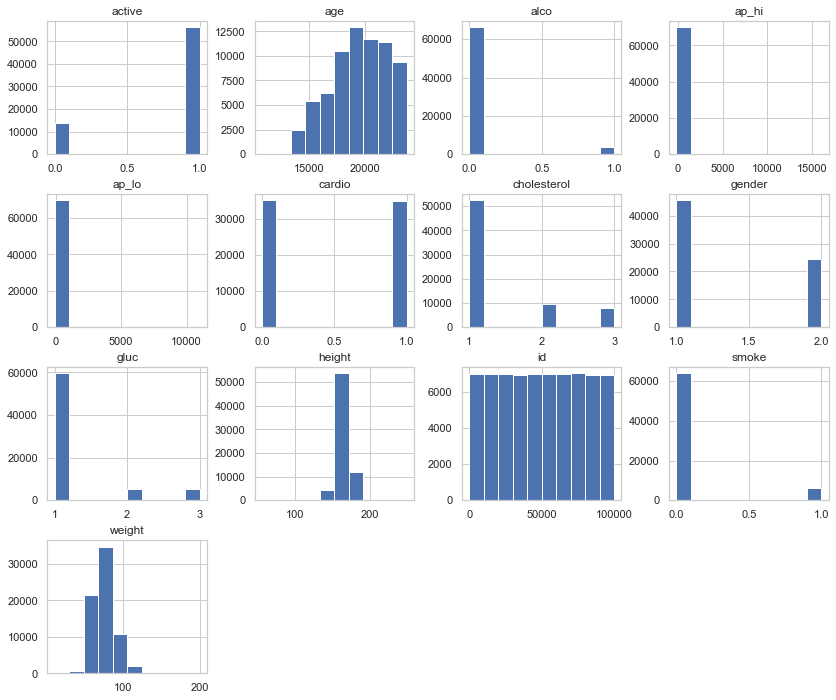

In [4]:
#Histogram charts, to look at the distribution of the values in the column to investigate for outliers

sns.set_style('whitegrid')
df_num = df.select_dtypes(include=['float64'])
df.hist(figsize =(14,12))


As suspected, we can tell that ap_hi and ap_lo have outliers because the mins and maxes are not reasonable values for blood pressure.

In [5]:
# Selected column to look for outliers
dfs= df[["age", "height", "weight", "ap_hi", "ap_lo"]]
dfs.describe()

,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,164.359229,74.205690,128.817286,96.630414
std,2467.251667,8.210126,14.395757,154.011419,188.472530
min,10798.000000,55.000000,10.000000,-150.000000,-70.000000
25%,17664.000000,159.000000,65.000000,120.000000,80.000000
50%,19703.000000,165.000000,72.000000,120.000000,80.000000
75%,21327.000000,170.000000,82.000000,140.000000,90.000000
max,23713.000000,250.000000,200.000000,16020.000000,11000.000000


Text(0.5, 1.0, 'Boxplot of Continuous Variables')

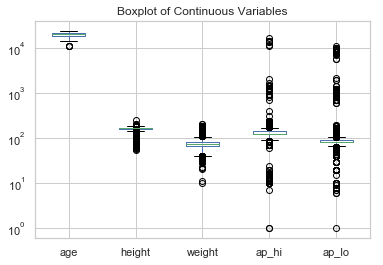

In [22]:
# Box plot of the different variables to gain more general information of the distribution values in the variables
ax = dfs.boxplot()
ax.set_yscale('log')
ax.set_title('Boxplot of Continuous Variables')

In [7]:
#Let examine the height, weight and blood pressure
dfhw= df[["height", "weight","ap_hi", "ap_lo"]]
dfhw

dfbp= dfhw[np.abs(dfhw -dfhw.mean()) <= (3*dfhw.std())]
dfhw
dfhw.describe() 

,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000
mean,164.359229,74.205690,128.817286,96.630414
std,8.210126,14.395757,154.011419,188.472530
min,55.000000,10.000000,-150.000000,-70.000000
25%,159.000000,65.000000,120.000000,80.000000
50%,165.000000,72.000000,120.000000,80.000000
75%,170.000000,82.000000,140.000000,90.000000
max,250.000000,200.000000,16020.000000,11000.000000


By keeping only the ones that are within +3 to -3 standard deviations in the column selected. We have the display from the above code. So, in this case, this code does not help us, so we will proceed to work each column by hand and take out the mistaken value in the code that follow below.

In [8]:
# We address the outlier of the BP by taaking the reasonable blood presure measurement, 
# the other value likely are a mistake
df1 = df[df["ap_hi"] < 200]
df1 = df1[df1["ap_hi"] > 110]
df1 = df1[df1["ap_lo"] < 150]
df1 = df1[df1["ap_lo"] > 60]
df1.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,55448.000000,55448.000000,55448.000000,55448.000000,55448.000000,55448.000000,55448.000000,55448.000000,55448.000000,55448.000000,55448.000000,55448.000000,55448.000000
mean,50051.237953,19681.483805,1.366199,164.658906,75.389983,131.062238,83.799921,1.394406,1.240460,0.089471,0.054844,0.800390,0.553960
std,28868.075564,2399.653297,0.481769,8.165963,14.335829,14.220016,7.703276,0.705501,0.589845,0.285425,0.227678,0.399711,0.497084
min,1.000000,10859.000000,1.000000,55.000000,11.000000,111.000000,61.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25029.250000,18159.000000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50104.000000,19830.000000,1.000000,165.000000,73.000000,125.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,74971.500000,21698.000000,2.000000,170.000000,83.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,197.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# We address the weight with reasonable weight, the other values probably are a mistake
df1 = df1[df1["weight"] < 200]
df1 = df1[df1["weight"] > 55]
df1.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000
mean,50057.197730,19681.349345,1.373701,164.989817,76.431673,131.173148,83.861805,1.396928,1.243224,0.090103,0.055658,0.799880,0.558764
std,28827.698563,2395.071935,0.483790,8.034020,13.677961,14.261529,7.724774,0.707480,0.592667,0.286332,0.229262,0.400094,0.496539
min,1.000000,10859.000000,1.000000,55.000000,56.000000,111.000000,61.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25105.250000,18161.000000,1.000000,160.000000,66.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50069.500000,19829.000000,1.000000,165.000000,74.000000,125.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,74921.500000,21692.000000,2.000000,170.000000,84.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,180.000000,197.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
# We address the height, the other values probably are a mistake
df1 = df1[df1["height"] < 200]
df1 = df1[df1["height"] > 130]
df1.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000,53053.000000
mean,50059.609824,19681.817352,1.373739,165.069421,76.417400,131.177294,83.863043,1.397150,1.243247,0.090136,0.055661,0.799974,0.558819
std,28829.182391,2394.809551,0.483800,7.683949,13.638346,14.262603,7.724346,0.707587,0.592685,0.286380,0.229269,0.400024,0.496533
min,1.000000,10859.000000,1.000000,131.000000,56.000000,111.000000,61.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25109.000000,18161.000000,1.000000,160.000000,66.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50079.000000,19830.000000,1.000000,165.000000,74.000000,125.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,74926.000000,21692.000000,2.000000,170.000000,84.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,198.000000,180.000000,197.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


The age is appropriate for a human person from 30 to 65 year old.Please see below

In [10]:
df1.age.describe()
age= df1.age/360
age.describe

<bound method NDFrame.describe of 1        56.188889
2        52.380556
3        48.952778
5        60.872222
6        61.425000
7        62.733333
10       62.583333
11       52.263889
12       41.086111
14       40.366667
15       46.616667
16       59.155556
19       60.430556
20       54.938889
21       59.480556
22       64.016667
24       46.133333
25       40.147222
26       54.330556
27       50.236111
28       40.483333
29       58.491667
30       50.808333
31       64.405556
33       57.366667
34       60.944444
36       50.911111
37       49.933333
38       64.966667
39       50.350000
           ...    
69963    54.272222
69964    62.475000
69965    42.916667
69966    56.463889
69969    57.025000
69970    62.700000
69971    55.933333
69972    47.402778
69973    61.505556
69974    50.627778
69975    59.066667
69976    60.275000
69977    46.786111
69979    62.286111
69981    48.611111
69982    52.613889
69983    54.588889
69984    49.794444
69985    50.538889
69986    50.5500

See the figure below from the American Heart Association about categories of blood pressure.

Normal blood pressure is below 120/80 mm Hg. If you’re an adult and your systolic pressure is 120 to 129, and your diastolic pressure is less than 80, you have elevated blood pressure. High blood pressure is a systolic pressure of 130 or higher,or a diastolic pressure of 80 or higher, that stays high over time. High blood pressure usually has no signs or symptoms. That’s why it is so dangerous. But it can be managed. Nearly half of the American population over age 20, have HBP, and many don’t even know it. Not treating high blood pressure is dangerous. High blood pressure increases the risk of heart attack and stroke. Stage 1(systolic BP 130 to 140 and dystolic blood presure more than 80) is more dangerous than just high blood pressure. Stage 2(systolic blood presure more than 140 to 180 and dystolic blood pressure more than 90), more dangerous than stage 1. Stage 3(systolic blood pressure more than 180 and dystolic blood pressure more than 120). Stage 3 is more dangerous than stage 1 and 2. In the graph above you can see how the higher the blood pressure in each of the levels(Normal, high blood pressure, stage1, stage 2, stage 3) the most likely to have a heart event.

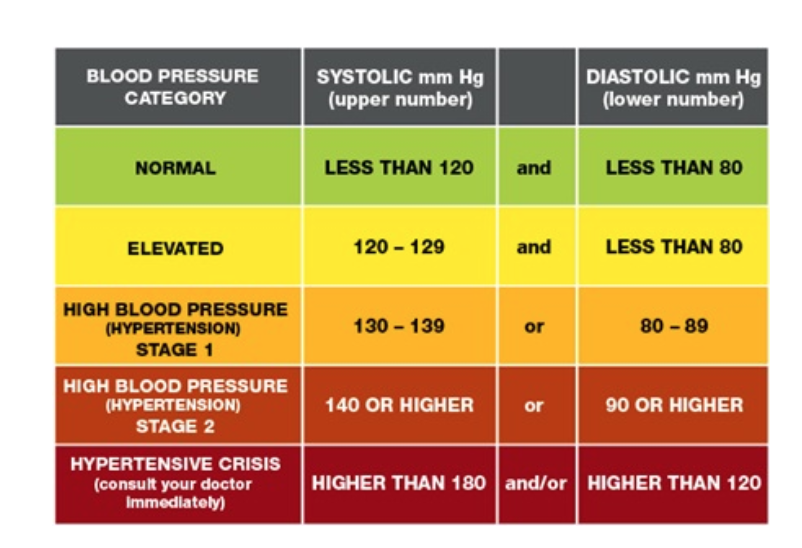

In [11]:
# bin blood pressure groups based on the api hi/ lo variables
df1['bp'] = np.where((df1.ap_hi < 120) & (df1.ap_lo < 80), 1, 0)
df1['bp'] = np.where((df1.ap_hi >= 120) & (df1.ap_hi < 130) & (df1.ap_lo < 80), 2, df1.bp)
df1['bp'] = np.where((df1.ap_hi >= 130) & (df1.ap_hi < 140) | ((df1.ap_lo >= 80) & (df1.ap_lo < 90)), 3, df1.bp)
df1['bp'] = np.where((df1.ap_hi >= 140) | (df1.ap_lo >= 90), 4, df1.bp)
df1['bp'] = np.where((df1.ap_hi > 180) | (df1.ap_lo > 120), 5, df1.bp)
df1.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bp
count,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000,53128.000000
mean,50057.197730,19681.349345,1.373701,164.989817,76.431673,131.173148,83.861805,1.396928,1.243224,0.090103,0.055658,0.799880,0.558764,3.367320
std,28827.698563,2395.071935,0.483790,8.034020,13.677961,14.261529,7.724774,0.707480,0.592667,0.286332,0.229262,0.400094,0.496539,0.592344
min,1.000000,10859.000000,1.000000,55.000000,56.000000,111.000000,61.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25105.250000,18161.000000,1.000000,160.000000,66.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,50069.500000,19829.000000,1.000000,165.000000,74.000000,125.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,3.000000
75%,74921.500000,21692.000000,2.000000,170.000000,84.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,4.000000
max,99999.000000,23713.000000,2.000000,250.000000,180.000000,197.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [12]:
df1['bp1'] = pd.cut(df1.bp,[0,1,2,3,4,5],5,labels=['Normal','Elevated','Hyper_Stage1','Hyper_Stage2','Hyper_Stage3' ]) # this creates a new variable
#print(df1.bp1.info())

BMI Clasification

<br><b>BMI</b>: Body Mass Index calculated as folows: <b> weight (in kg) / (height(in cm)/100)^2 </b>

In [13]:
# compute the body mass index based on weight and height
df1['bmi'] = df1['weight'] / (df1['height']/100)**2
# create a BMI group
df1['bmiGrp'] = np.where((df1.bmi < 18.5), 1, 0)
df1['bmiGrp'] = np.where((df1.bmi >= 18.5) & (df1.bmi < 25), 2, df1.bmiGrp)
df1['bmiGrp'] = np.where((df1.bmi >= 25) & (df1.bmi < 30), 3, df1.bmiGrp)
df1['bmiGrp'] = np.where((df1.bmi >= 30), 4, df1.bmiGrp)

In [31]:
df1['bmiGrp1'] = pd.cut(df1.bmiGrp,[0,1,2,3,4],4,labels=['Under Weight','Normal Weight','Over Weight','Obese' ]) # this creates a new variable
df1.bmiGrp1

1                Obese
2        Normal Weight
3          Over Weight
5          Over Weight
6                Obese
7          Over Weight
10         Over Weight
11       Normal Weight
12       Normal Weight
14         Over Weight
15               Obese
16         Over Weight
19       Normal Weight
20               Obese
21         Over Weight
22               Obese
24       Normal Weight
25         Over Weight
26       Normal Weight
27               Obese
28       Normal Weight
29         Over Weight
30               Obese
31       Normal Weight
33         Over Weight
34         Over Weight
36               Obese
37         Over Weight
38         Over Weight
39         Over Weight
             ...      
69963            Obese
69964    Normal Weight
69965    Normal Weight
69966      Over Weight
69969      Over Weight
69970            Obese
69971      Over Weight
69972      Over Weight
69973    Normal Weight
69974      Over Weight
69975            Obese
69976    Normal Weight
69977      

In [32]:
df = df1

# Simple Statistics

### Outline of the section

This section will focus on simple statistics and capture the central tendency and spread of all the dataset variables. These fundamental statistics values give us a better understanding of the data set and how it can be leveraged to find the dataset's hidden pattern. This is more of a preparatory stage, where we kick the tires and get a good understanding of data type, data spread, data distribution, and look and feel of the values. We have used following graphical to share the data variable

1. Pie Charts for proportion of categorical variables
2. Bar Charts for mean, median, and mode of continuous variables

### Checking the types of data

Check for the datatypes to ensure integer are not stored as a string or object, if in that case, we have to convert that string to the integer data only then we can plot the data via a graph. Here, in this case, the data is already in integer format so nothing to worry.


In [14]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

### Count number or rows and columns in dataframe 

In [24]:
df.shape       ## Dim of data frame

(70000, 13)

Show the number of rows and columns in the data set after cleaning up of data set and adding new variables that will play a critical role in data analysis. This dataset have ~53K rows and 18 columns.


### Statistical Summary
To better understand the dataset, create a Statistical Summary or 5-point summary of the cleaned-up data. This summary gives us an overview tells the descriptive summary, which includes mean, median, data percentile distribution, no. of rows, maximum and minimum value for each variable.

In [25]:
df.describe() 

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#### Break down of distribution in variable

Gender: Provides distribution of Men and Women in the dataset.

In [15]:
# Count men and Women

df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

Dataset contains 1.8 times more women than men. In Pie cahrt below women are shown in blue color and men are shown in orange.


Text(0.5, 1.0, 'Data by Gender (1=Female, 2=Male)')

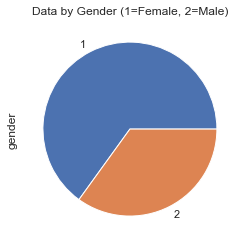

In [16]:
# gender
pc=df["gender"].value_counts().plot(kind='pie')
pc.set_title('Data by Gender (1=Female, 2=Male)')

Distribution of Cholesterol:

Cholesterol shows three values 1, 2, and 3. 1 is normal vs. as 2 and 3 demonstrates above normal and well above normal. 

In [28]:
# Count Cholesterol Levels

df['cholesterol'].value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

25% of people in the dataset have higher cholesterol values. values are almost equaly distributed between category 2 and 3. 


Text(0.5, 1.0, 'Cholesterol Categories (1=Low)')

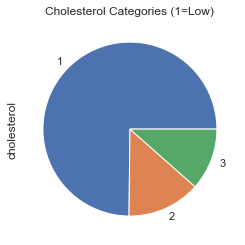

In [17]:
# Cholestrol
pc=df["cholesterol"].value_counts().plot(kind='pie')
pc.set_title('Cholesterol Categories (1=Low)')

Distribution of Glucose:

Glucose is also distributed in three part 1, 2 and 3. Similar to cholesterol 1 is normal, 2 and 3 are above normal or well above normal. 

In [18]:
# Count glucose  Levels

df['gluc'].value_counts()

1    59479
3     5331
2     5190
Name: gluc, dtype: int64


15% people have higher glucose


Text(0.5, 1.0, 'Glucose Values (1=Low)')

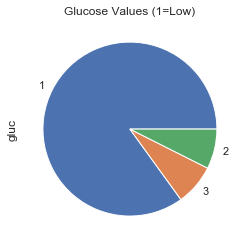

In [19]:
# glucose Pie Chart
pc=df["gluc"].value_counts().plot(kind='pie')
pc.set_title('Glucose Values (1=Low)')

Distribution of Smokers:

Smokers are distrinuted in two part smoker and non smokers. 

In [27]:
# Count smokers vs. non-smokers

df['smoke'].value_counts()

0    48271
1     4782
Name: smoke, dtype: int64


8% are smoker in data set. 


Text(0.5, 1.0, 'Patients who Smoke')

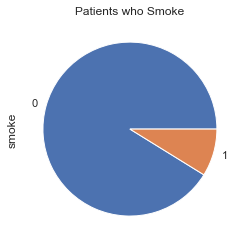

In [20]:
# Smoke Pie Chart
bc=df["smoke"].value_counts().plot(kind='pie')
bc.set_title('Patients who Smoke')

Smokers are represented in blue, and orange shows no-smoker. 

Distribution of Cardio:

1: shows people having cardio issues.

0: people have non cardio issues.

In [32]:
# Count activity people vs. non-smokers

df['cardio'].value_counts()


0    35021
1    34979
Name: cardio, dtype: int64

~50% of the samples have CVD (Cardio Vascular Disease), this is well-balanced data.

Text(0.5, 1.0, 'Cardiac Disease Indicator')

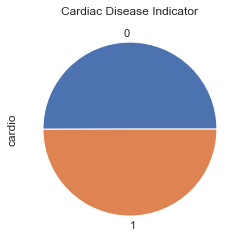

In [21]:
# Cadio Pie Chart
pc=df["cardio"].value_counts().plot(kind='pie')
pc.set_title("Cardiac Disease Indicator")

### Calcualte Mean, Median and Mode

The code below calculates the mean and median, continuous variables.

The mode is calculated for both continuous and categorical variables. 

In [22]:
#Calculate Mean of contiguous variable
df.loc[:,['age','height','weight','ap_lo','ap_hi']].mean()

age       19468.865814
height      164.359229
weight       74.205690
ap_lo        96.630414
ap_hi       128.817286
dtype: float64

In [45]:
#Calculate Median of contiguous variable
df.loc[:,['age','height','weight','ap_lo','ap_hi']].median()

age       19830.0
height      165.0
weight       74.0
ap_lo        80.0
ap_hi       125.0
dtype: float64

In [23]:
#Calculate Mode of contiguous variable
df.loc[:,['age','height','weight','ap_lo','ap_hi','cholesterol','gluc', 'smoke', 'alco', 'active']].mode()

,age,height,weight,ap_lo,ap_hi,cholesterol,gluc,smoke,alco,active
0,18236,165.0,65.0,80.0,120.0,1.0,1.0,0.0,0.0,1.0
1,19741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Plot Mean, Medin and Mode for Age in days

Code below creates a histogram and show mean, medium and mode of age in days. 

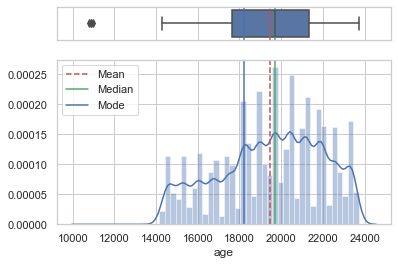

In [24]:
# Calculate and plot mean medium and mode of age and spread of data

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['age'].mean()
median=df['age'].median()
mode=df['age'].mode()[0]
# create Box Plot
sns.boxplot(df["age"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')
# create histogram
sns.distplot(df["age"], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='')
plt.show()

Mean, Mediun ad Mode are dispersed in dataset. Value calcuated above show, mean as 19469, medium as 19763 and mode as 18236. Mean and Medium are very close to each other. 

### Avg Height of Woman and Men:
To figure out whether "1" stands for women or men in the gender column. Calculate the mean of height per gender. We assume that men are taller than women on average.

Average height for women in data is 161.1 cm and average height of men is 170 cmm.

Based on the outcome, women ware denoted by 1, and Man are represented by 2.

In [25]:
df.groupby('gender')['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

Text(0.5, 1.0, 'Height Distribution')

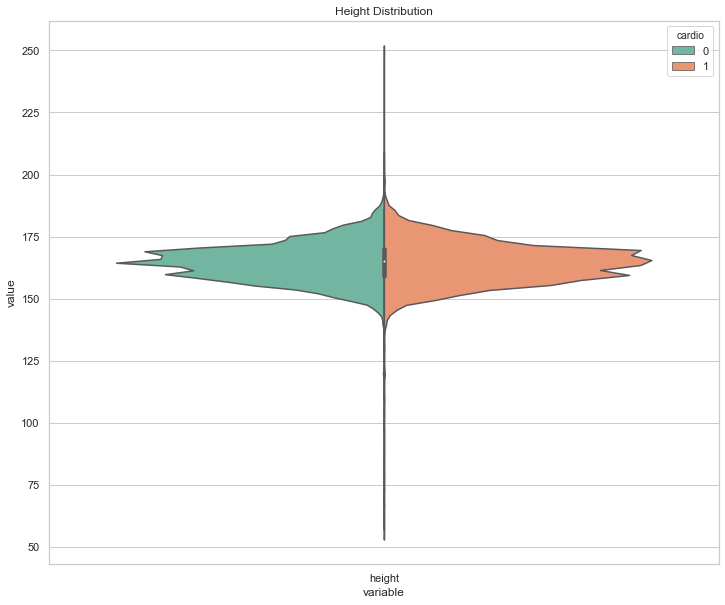

In [35]:
# Height
import warnings
warnings.filterwarnings("ignore")
df_melt = pd.melt(frame=df, value_vars=['height'], id_vars=['cardio'])
plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='cardio', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2");
ax.set_title("Height Distribution")


### Plot Mean, Medin and Mode of Height
Code below creates a histogram and show mean, medium and mode of height in cm.

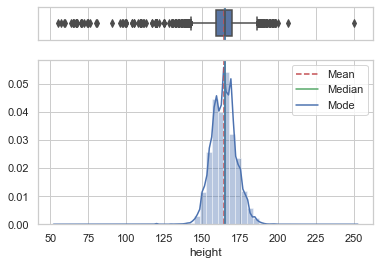

In [37]:

# Calcualte and plot mean medium and mode of Height and spread of data
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['height'].mean()
median=df['height'].median()
mode=df['height'].mode()[0]
# create Box Plot
sns.boxplot(df["height"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')
# create histogram
sns.distplot(df["height"], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='')
plt.show()


Mean Mediam and Mode are nicely aligned



### Mean, Median and Mode for Weight:

Plot Mean, Medin and Mode for Weight
Code below creates a histogram and show mean, medium and mode of weight.


Text(0.5, 1.0, 'Cardiac Disease Indicator')

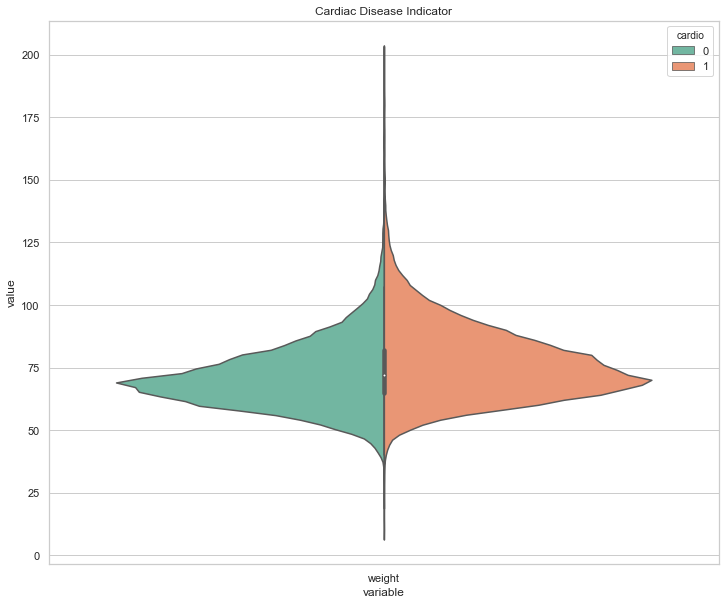

In [26]:
# Weight
import warnings
warnings.filterwarnings("ignore")
df_melt = pd.melt(frame=df, value_vars=['weight'], id_vars=['cardio'])
plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='cardio', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2");
ax.set_title('Cardiac Disease Indicator')

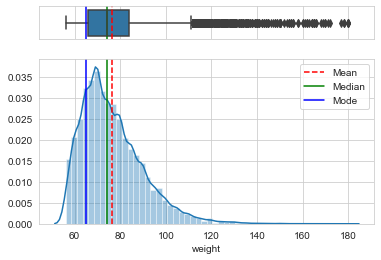

In [39]:
# Calcualte and plot mean medium and mode of age and spread of dataCalcualte mean medium and mode

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['weight'].mean()
median=df['weight'].median()
mode=df['weight'].mode()[0]
# create Box Plot
sns.boxplot(df["weight"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')
# create histogram
sns.distplot(df["weight"], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')
# ceate legend
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='')
plt.show()

Mean, Mediam and Mode are not aligned. Mean get infulanced by extrime values. As listed calculated above mean is 74, Mediam is 72 and mode is 65.  As mean is higher than mode and medium it is indication dataset have extrime values on higher side of weight.midle of weight is at 72 and most of the weight value is 65. 


### Mean, Median and Mode for ap_hi (Systolic):

Plot Mean, Medin and Mode for ap_hi
Code below creates a histogram and show mean, medium and mode of ap_hi.


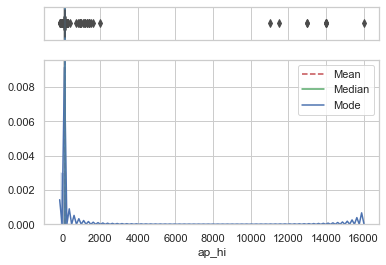

In [27]:

# Calcualte and plot mean medium and mode of ap_hi and spread of dataCalcualte mean medium and mode

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['ap_hi'].mean()
median=df['ap_hi'].median()
mode=df['ap_hi'].mode()[0]
# create Box Plot
sns.boxplot(df["ap_hi"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')
#create Histogram
sns.distplot(df["ap_hi"], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')
# create legend
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='')
plt.show()

Mean, Median and Mode are very close 128,120 and 120. As data is spread on higher side and Mean gets impacted by extrime values, mean is little higher than median and mode. 


### Mean, Median and Mode for ap_lo (Diastolic)

Plot Mean, Medin and Mode for ap_lo

Code below creates a histogram and show mean, medium and mode of ap_lo.


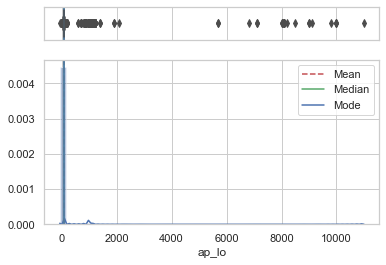

In [28]:
# Calculate and plot mean medium and mode of ap_lo and spread of dataCalcualte mean medium and mode
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['ap_lo'].mean()
median=df['ap_lo'].median()
mode=df['ap_lo'].mode()[0]
# create Box Plot
sns.boxplot(df["ap_lo"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')
#Create histogram
sns.distplot(df["ap_lo"], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')
# create legend
plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='')
plt.show()

As calucate above Mean, Medium and Mode are 96,80 and 80.Mode and medium alinge however mean is higher as mean get infulanced by extrime values. 

# New Features

We were able to create Body Mass Index (BMI) data and categorize it per the American Heart Association Guidelines.  This new attribute used the height and weight variables in the data is referenced throughout this project.  In addition, we created blood pressure categories per American Heart Association Guidelines.  These used the values of systolic and diastolic blood pressure in our source data.

We did not have the ability to join new data tables to our data.   We do not know who the actual 70,000 patients in our data are, so there was no way to get additional data about them.   We would have liked to see Cholesterol HDL/ LDL numbers in addition to the high/medium/low categories that we were given

Furthermore, none of the the other attributes in the data contained data where it made sense to join them to a lookup or dimension table.


In [41]:
df['BMI'] = df['weight']/((df['height']/100)**2)
df['age_yr'] = df['age']/360

In [43]:
df['Blood_Pressure_Level_S'] = pd.cut(df1.ap_hi,[0,120,129,139,180, 200],5,labels=['Normal','Elevated','Hyper_Stage1','Hyper_Stage2','Hyper_Stage3' ]) # this creates a new variable
df.Blood_Pressure_Level_S

df['Blood_Pressure_Level_D'] = pd.cut(df1.ap_lo,[0,78,80,90,120,140],5,labels=['Normal','Elevated','Hyper_Stage1','Hyper_Stage2','Hyper_Stage3' ]) # this creates a new variable
df.Blood_Pressure_Level_D

0                 NaN
1        Hyper_Stage1
2              Normal
3        Hyper_Stage2
4                 NaN
5            Elevated
6            Elevated
7        Hyper_Stage1
8                 NaN
9                 NaN
10           Elevated
11           Elevated
12           Elevated
13                NaN
14       Hyper_Stage1
15           Elevated
16             Normal
17                NaN
18                NaN
19             Normal
20           Elevated
21           Elevated
22       Hyper_Stage1
23                NaN
24       Hyper_Stage1
25       Hyper_Stage2
26       Hyper_Stage1
27           Elevated
28           Elevated
29             Normal
             ...     
69970        Elevated
69971        Elevated
69972    Hyper_Stage1
69973        Elevated
69974        Elevated
69975        Elevated
69976        Elevated
69977        Elevated
69978             NaN
69979    Hyper_Stage2
69980             NaN
69981    Hyper_Stage1
69982    Hyper_Stage1
69983        Elevated
69984     

# Visualize Attributes

Text(0.5, 1.0, 'Cardiac Event and Blood Pressure')

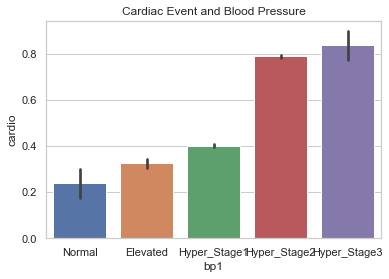

In [43]:

sns.barplot(x='bp1', y='cardio', data=df1, saturation=0.8)
plt.title('Cardiac Event and Blood Pressure')

Text(0.5, 1.0, 'Cardiac Event and BMI')

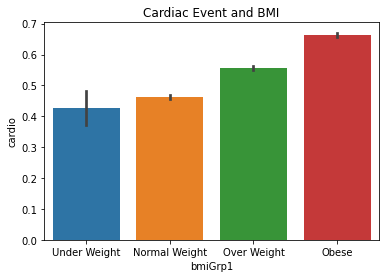

In [17]:
sns.barplot(x='bmiGrp1', y='cardio', data=df1, saturation=0.8)
plt.title('Cardiac Event and BMI')

Cholesterol values over 1 seem to have an impact on cardiovascular disease.

Text(0.5, 0, 'Cholesterol (1=Normal, 2=Above Normal, 3=Well Above Normal)')

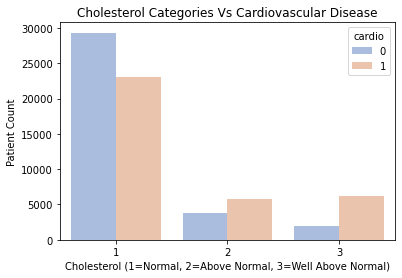

In [18]:
bc=sns.countplot(x="cholesterol", hue="cardio",  alpha=.5, palette="muted",data=df)
bc.set_title('Cholesterol Categories Vs Cardiovascular Disease')
bc.set_ylabel('Patient Count')
bc.set_xlabel('Cholesterol (1=Normal, 2=Above Normal, 3=Well Above Normal)')

Glucose categories seem to have an impact on the cardiovascular disease target indicator

Text(0.5, 0, 'Glucose (1=Normal, 2=Above Normal, 3=Well Above Normal)')

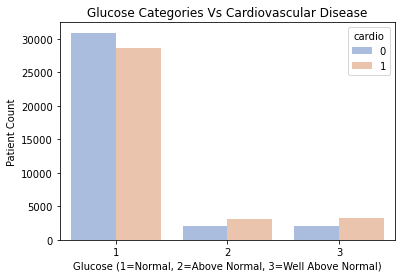

In [19]:
bc=sns.countplot(x="gluc", hue="cardio",  alpha=.5, palette="muted",data=df)
bc.set_title('Glucose Categories Vs Cardiovascular Disease')
bc.set_ylabel('Patient Count')
bc.set_xlabel('Glucose (1=Normal, 2=Above Normal, 3=Well Above Normal)')

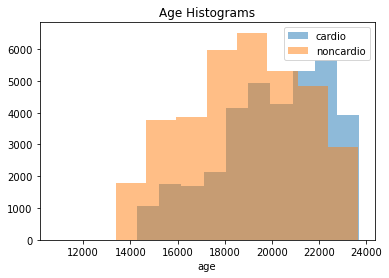

In [21]:
cardio = df[df["cardio"]==1]
noncardio = df[df["cardio"]==0]


plt.hist(cardio['age'], alpha=0.5, label='cardio')
plt.hist(noncardio['age'], alpha=0.5, label='noncardio')
plt.title("Age Histograms")
plt.xlabel("age")
plt.legend(loc='upper right')
plt.show()

# Explore Joint Attributes

In this section, variables will be compared with each other to explore the relationships between attributes. Attributes will be reviewed using scatterplots, correlation, cross-tabulation, group-wise averages, etc. Certain interesting relationships will also be discussed.

### HeatMap

Heat Map is a type of plot which is necessary when we need to find the dependent variables.
Age show some correlation with glucose, ap_lo, ap_hi, and cholesterol. These variables' values are expected to go up with age. Cardio also offer a higher correlation with age, i.e., people at higher age are expected to get CVD. Alcohol and Smoking show a higher correlation with gender. Men smoke and drink alcohol more than women. However, cardio and smoke do not indicate a high correlation. Smoking is related to height too (maybe a good example of correlation do not lead to causation)
Weight shows a relationship with ap_lo and ap_hi. Also, ap_lo and ap_hi show 70% correlation. A strong relationship is observed between cholesterol and glucose, as well.

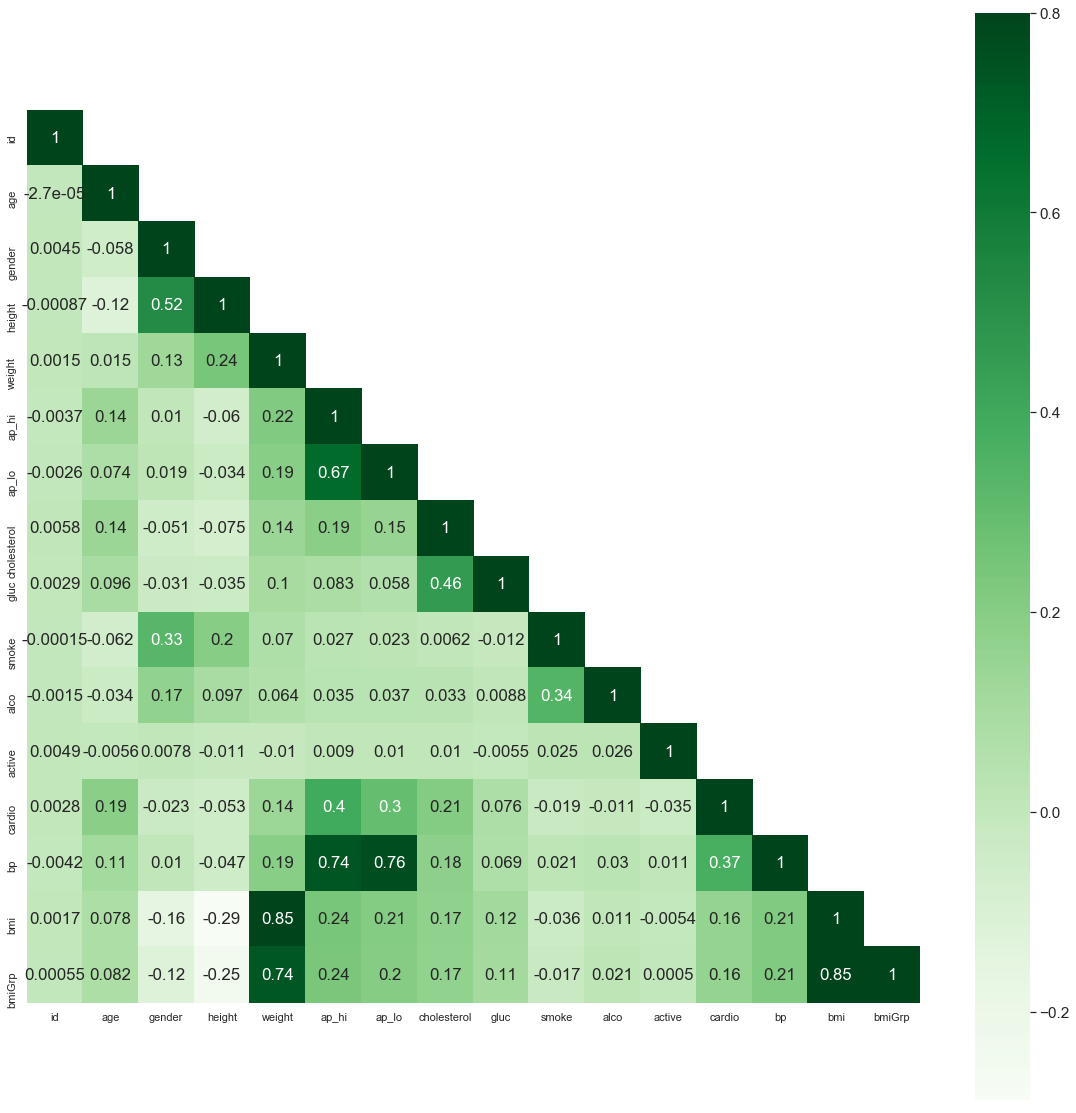

In [49]:
corrMatt = df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,20)
sns.set(font_scale=1.4)
sns.heatmap(corrMatt, cmap="Greens", mask=mask,vmax=0.8, square=True,annot=True)

### Bivariate Analysis
Categorical variables by target class :It is evident that patients with CVD have higher cholesterol and blood glucose level (look at Red and Green bars), also they are less active (higher blue and lower orange bar).

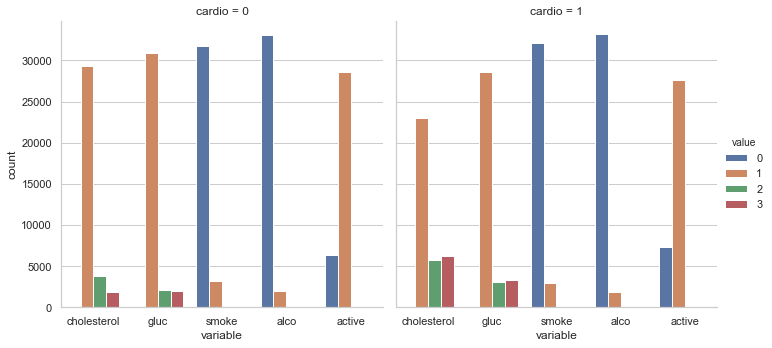

In [39]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count");


### Correlation of all the variable with cardio

In [44]:
correlations = df.corr()['cardio'].drop('cardio')
print(correlations)

id             0.003799
age            0.238159
gender         0.008109
height        -0.010821
weight         0.181660
ap_hi          0.054475
ap_lo          0.065719
cholesterol    0.221147
gluc           0.089307
smoke         -0.015486
alco          -0.007330
active        -0.035653
BMI            0.165632
age_yr         0.238159
Name: cardio, dtype: float64


Age, Weight and Cholestro shows higest coreleation. 


### Scatter Plot Age vs. Weight

As evident from the table above, Age and weight are continuous variables and show a higher correlation to cardio. We created a scatter plot. We can see as we move right to scatter plat orange dots density increase compare to blue dots. Whereas on the bottom left of the graph, higher blue dot density is observed.  

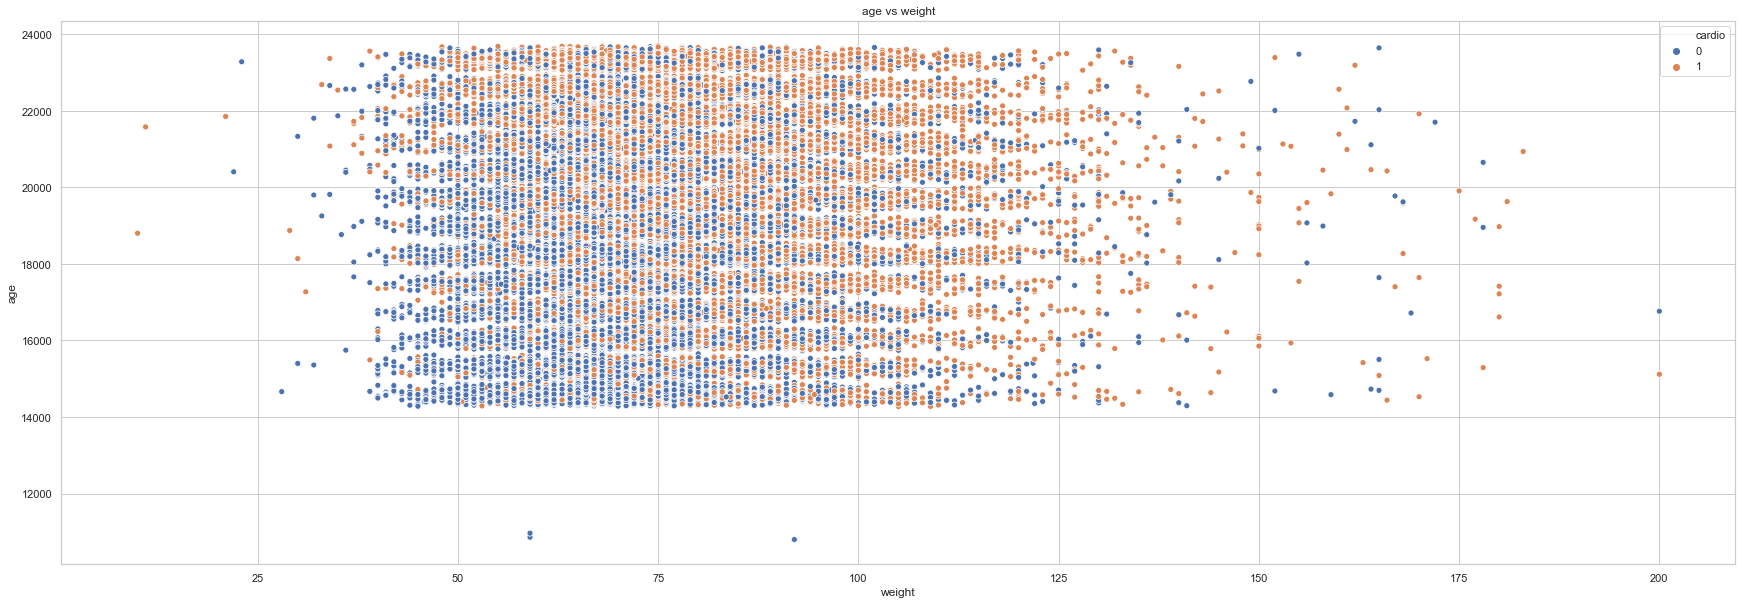

In [46]:
fig, ax = plt.subplots(1,1, figsize = (30,10))
sns.scatterplot(df['weight'],df['age'],ax=ax,hue=df['cardio'])
ax.set_title('age vs weight')
plt.show()

Higher age and more weight shows high probality of CVD relation

### Pair Plot
In pair plot is the matrix where each varavle is ploted against other variable. to see the relationship against each other. 

The diagonal plot which showcases the histogram. The histograms show the PDF/Probability distribution of a single variable
Upper triangle and lower triangle which shows us the scatter plot.
The scatter plots show us the relationship between the features. These upper and lower triangles are the replica of each other.

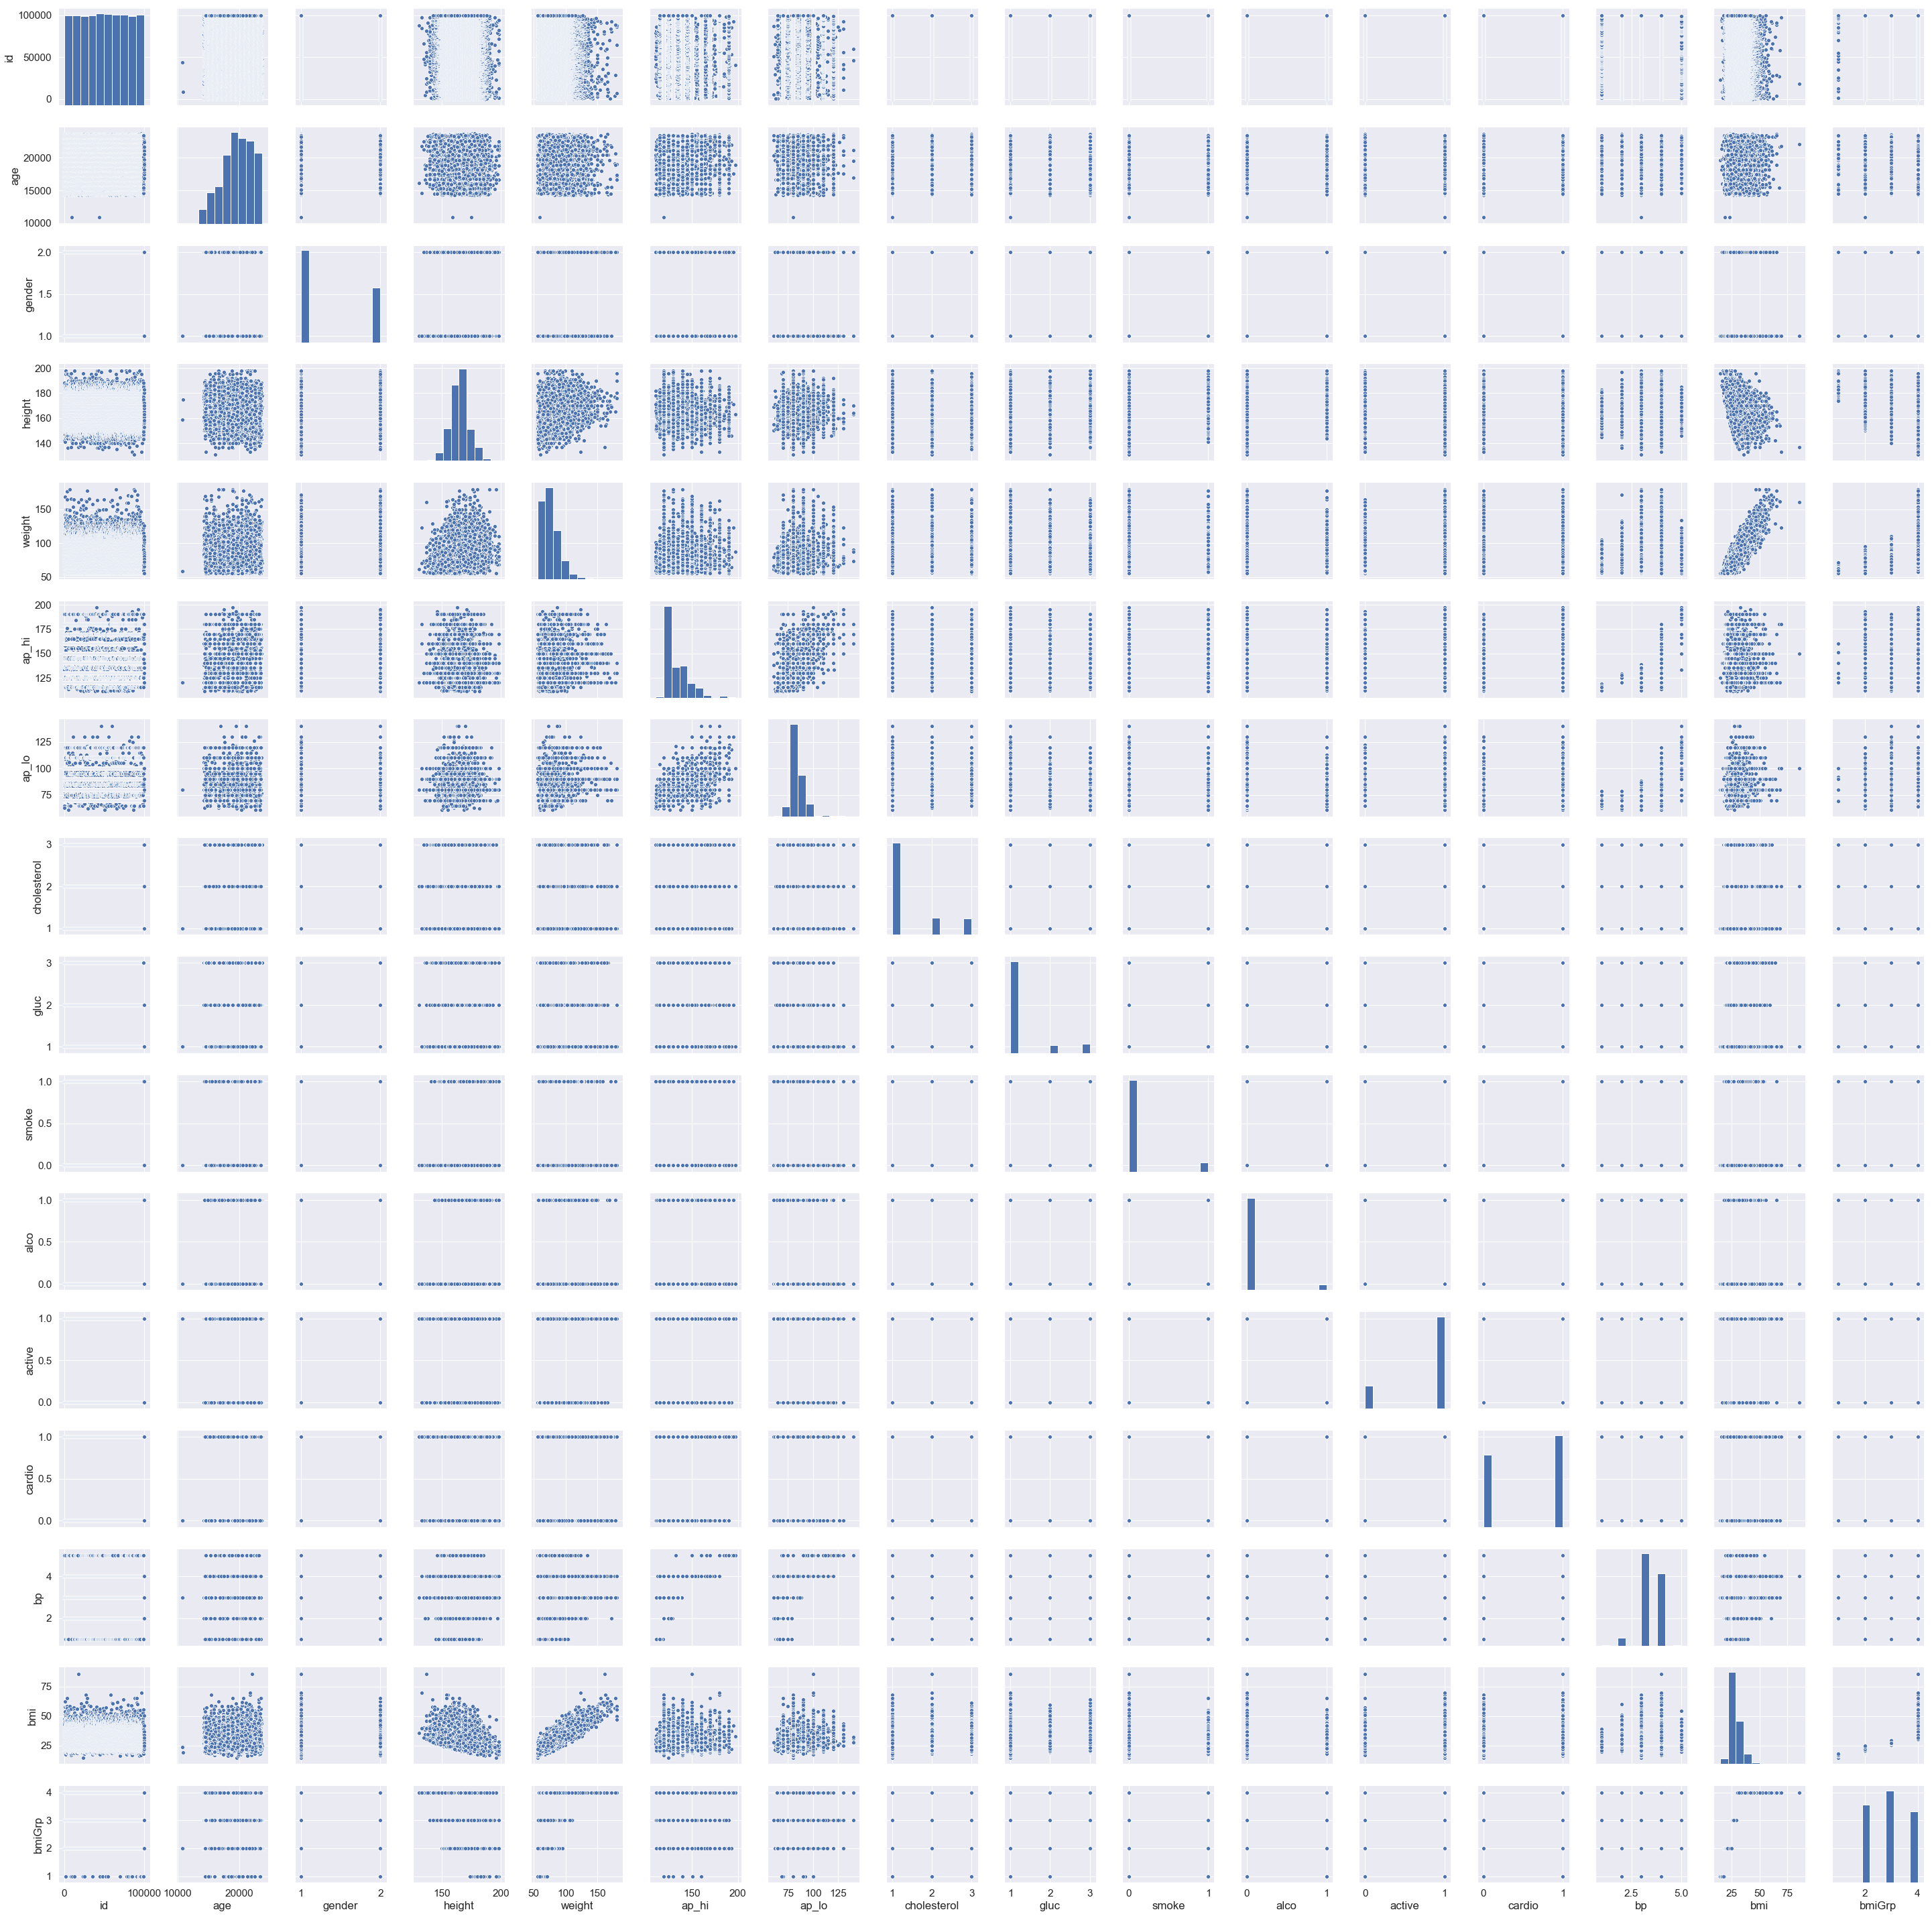

In [54]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(df)


### Pair Plot using cardio grouping

These pair plots are very similar to the plot above; however, scatter plots are grouped against the target variable. In our case, cardio is chosen as the target variable.

In [ ]:
sns.pairplot(df, hue = 'cardio')

### BMI, alcohol, gender, and cardio

This is a multi dimentional Box plot. This shows gender, BMI (Height and Weight), alcohol and cardio. 

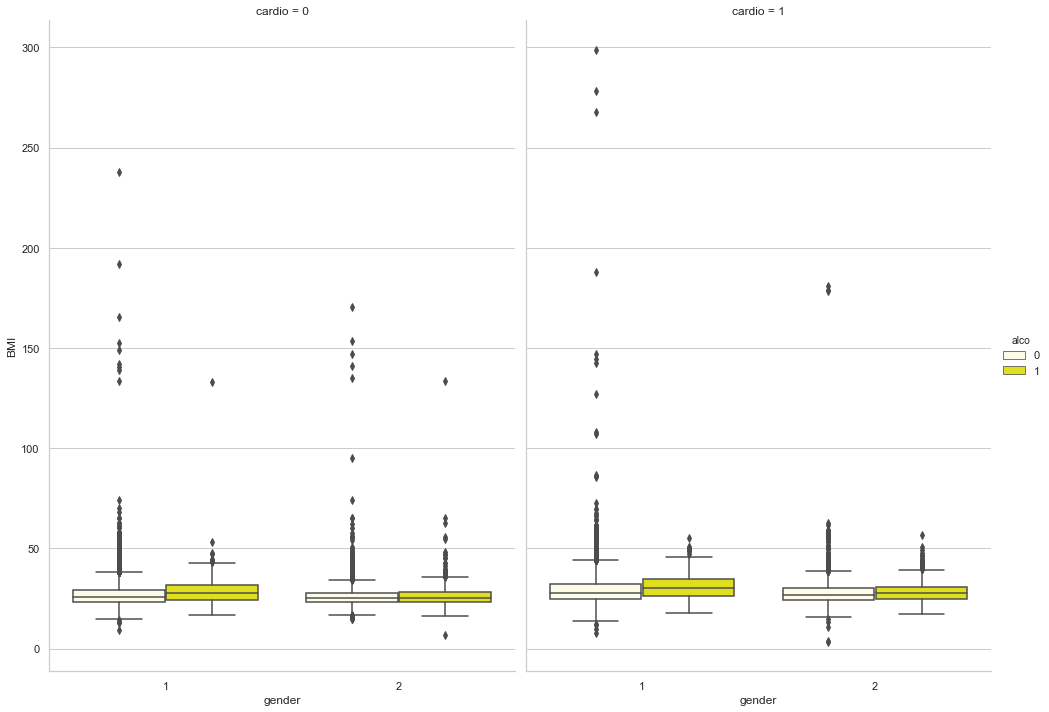

In [48]:
sns.catplot(x="gender", y="BMI", hue="alco", col="cardio", data=df, color = "yellow",kind="box", height=10, aspect=.7);

The following are a few observations from the graph above.

* Women taking alcohol have higher BMI for cardio 1 and 0 (i.e., CVD) or without CVD compare to men.
* In the given data set, men do not show much impact on BMI with and without alcohol. 
* Men have lower BMI than women (height is helping men to keep BMI lower)
* There no much difference is observed on the box for Cardio vs. non-Cardio. However, 90 percentile and 10 percentile is a little higher in the case of Cardio is 1. 

### Pivot gender, alco, age and cardio

Pivot against gender, smoke, alco, and Cardio is built to show the impact of gender, alcohol, and age on Cardio.

Based on the data, alcohol have minimal impact on Cardio. However, people taking alcohol have lower mean age. So a combination of lower age and alcohol is sort of countering each other, leading to reduce the impact on Cardio. 

In [58]:
 df.pivot_table(values=['age', 'cardio'], index=['gender', 'alco'], aggfunc='mean')

age    cardio
gender alco                        
1      0     19795.141581  0.567715
       1     19550.659379  0.569620
2      0     19530.756876  0.546438
       1     19263.235125  0.521593

In [57]:
 df.pivot_table(values=['age', 'cardio'], index=['gender', 'smoke'], aggfunc='mean')

age    cardio
gender smoke                        
1      0      19797.551865  0.567846
       1      19277.948490  0.563055
2      0      19583.383945  0.549234
       1      19203.908983  0.523821


Based on the data, smokers have minimal impact on Cardio. Women smoking has a lower mean age, so the impact on Cardio is low. However, men smokers have low Cardio. Also, the mean age of smokers is lower. So lower ager is having more impact on cardio leasing to lower smoking impact. 
So if smoking is seen in isolation, we will see no impact on women, and men smokers have less possibility of Cardio. But when seen with age, it becomes evident that lower mean age leads to reduced cardio possibility.

### Cross Tabulation between Smoke and Alcohol

In [58]:
pd.crosstab(df['smoke'], df['alco'])

alco,0,1
smoke,,
0,46780,1491
1,3320,1462


In given data set most of the people neighter smoke or drink alcohol (~88%) only only ~2.5% smoke and drink only ~9.5% people eiher smoke or drink. 

# Explore Attributes & Class

In this section we are comparing the explanatory variables against the target cardio response variable. 
In the data visualization section, we have already shown plots comparing blood pressure, Height/weight (in the form of BMI), Cholesterol, Glucose and Age.   The graphs below show the native blood pressure data as well as the smoking, alcohol and activity indicators given by the patients.

There are more women than men in the cardio data.   These graphs do not show a significant difference in cardiovascular disease between men and women.

Individual blood pressure values compared to the cardiac event indicator.

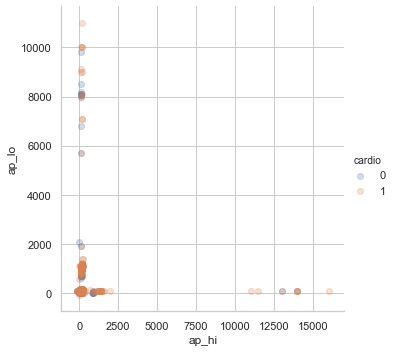

In [49]:
sns.lmplot('ap_hi', 'ap_lo', data=df, hue='cardio', fit_reg=False, scatter_kws={'alpha':0.25})


Plot Dyastolic and Systolic Blood Pressure Individually

Text(0.5, 1.0, 'Cardiac Event and Dyastolic Blood Pressure')

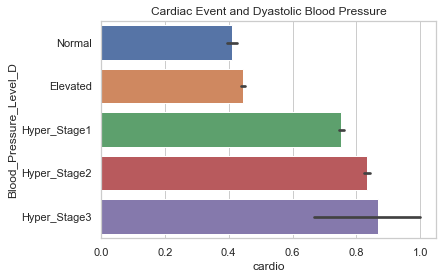

In [44]:
sns.barplot(x='cardio', y='Blood_Pressure_Level_D', data=df, saturation=0.8)
plt.title('Cardiac Event and Dyastolic Blood Pressure')

Text(0.5, 1.0, 'Cardiac Event and Systolic Blood Pressure')

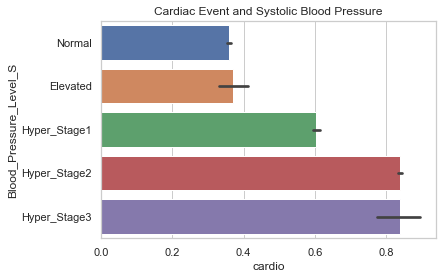

In [45]:
sns.barplot(x='cardio', y='Blood_Pressure_Level_S', data=df, saturation=0.8)
plt.title('Cardiac Event and Systolic Blood Pressure')

Graphs of Smoking, Alcohol consumption and Activity level are below.   In this data, they did not have much effect on the response variable

Text(0.5, 0, 'Smoker')

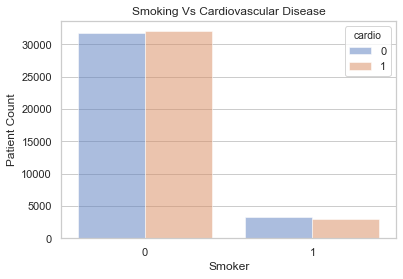

In [51]:
bc=sns.countplot(x="smoke", hue="cardio",  alpha=.5, palette="muted",data=df)
bc.set_title('Smoking Vs Cardiovascular Disease')
bc.set_ylabel('Patient Count')
bc.set_xlabel('Smoker')

Text(0.5, 0, 'Drinks Alcohol')

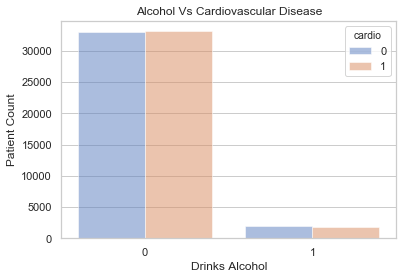

In [52]:
bc=sns.countplot(x="alco", hue="cardio",  alpha=.5, palette="muted",data=df)
bc.set_title('Alcohol Vs Cardiovascular Disease')
bc.set_ylabel('Patient Count')
bc.set_xlabel('Drinks Alcohol')

Text(0.5, 0, 'Active')

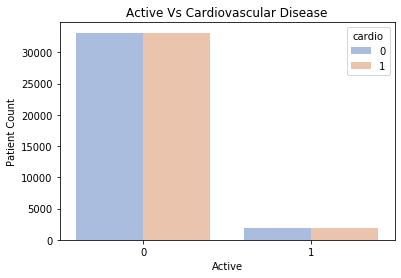

In [25]:
bc=sns.countplot(x="alco", hue="cardio",  alpha=.5, palette="muted",data=df)
bc.set_title('Active Vs Cardiovascular Disease')
bc.set_ylabel('Patient Count')
bc.set_xlabel('Active')

# Exceptional Work

We have researched and calculated Body Mass Index and Blood Pressure categories classified by the American Heart Association.   This work was described throughout the rest of this document.   
Below is our PCA analysis of the cardio data.


In [11]:
#scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
df_scaled = pd.DataFrame(scaler.transform(df))

[0.14946805 0.13372384]


Text(0, 0.5, 'PC2')

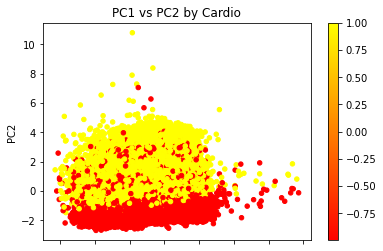

In [12]:
#PCA with scaled data

from sklearn.decomposition import PCA

X = df_scaled
y = df_scaled[12]

pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)

print(pca.explained_variance_ratio_)

df_pca = pd.DataFrame(X_pca)

ax = df_pca.plot.scatter(0, 1, c=y, colormap='autumn')
#newfig = plt.figure()
ax.set_title('PC1 vs PC2 by Cardio')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')